In [55]:
from sklearn.cluster import k_means
from sklearn.preprocessing import normalize

In [17]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [5]:
data = np.loadtxt('features.csv',delimiter=',',skiprows=1)

In [9]:
imgnos = data[:,0]
feats = data[:,1:]

In [10]:
feats.shape

(3049, 6)

In [88]:
feats2 = normalize(feats,axis=0)

In [112]:
_, lbl,_ = k_means(feats[:,1:],6)

(array([615.,   0., 434.,   0., 628.,   0., 477.,   0., 285., 610.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

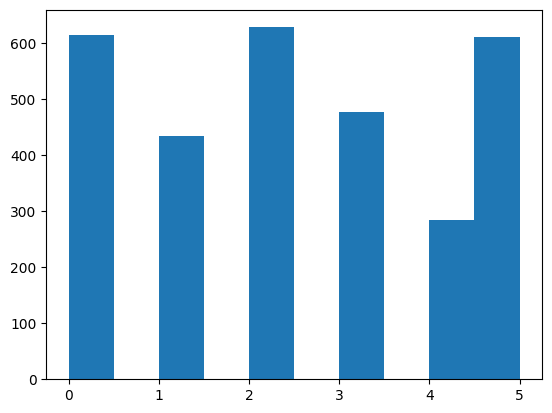

In [113]:
plt.hist(lbl)

In [128]:
# imgnos[lbl==0].astype('short')

In [129]:
groups = {v:list(imgnos[lbl==v]) for v in range(6)}

In [130]:
import json
json.dump(groups,open('groups.json','wt'))

/tmp/ipykernel_824/3332118681.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,10,ii+1)


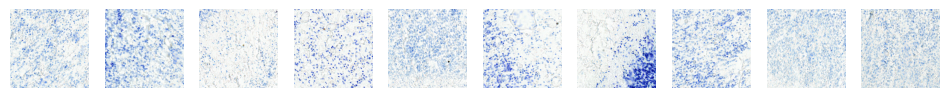

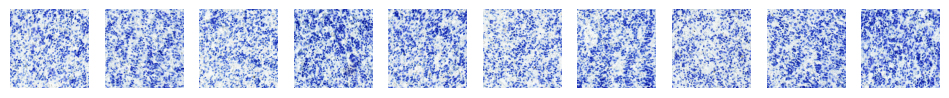

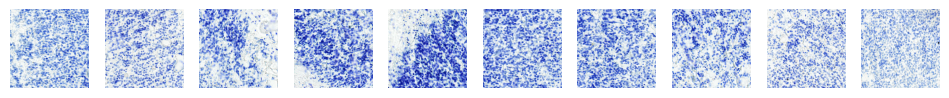

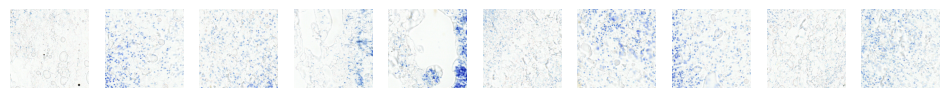

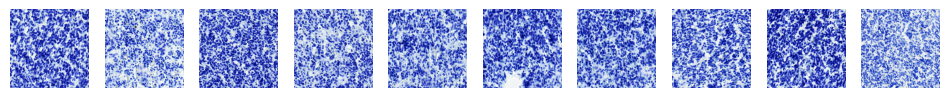

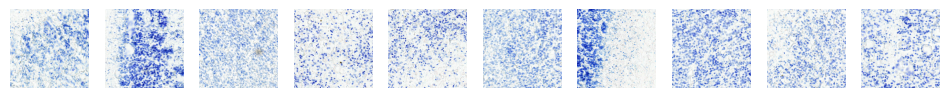

In [132]:
datadir='/data/special/web_viewer_verify/'
for lab in range(6):
    grp = imgnos[lbl==lab]
    plt.figure(figsize=(12,4))
    plt.title(str(lab))
    for ii,imgno in enumerate(np.random.choice(grp,10)):
        plt.subplot(1,10,ii+1)
        
        img = plt.imread(datadir+'/images/img_517_%d.jpg' % imgno)
        plt.imshow(img)
        plt.axis('off')